<a href="https://colab.research.google.com/github/NavyaPatil1011/Deep_learning_and_gen_ai_lab/blob/main/Week_7_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis using RNN, LSTM, Bi-directional LSTM, and GRU

This notebook implements sentiment analysis on the IMDB movie reviews dataset using different types of recurrent neural networks.

We use:
- Embedding layer
- Simple RNN
- LSTM
- Bidirectional LSTM
- GRU


In [2]:
# Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense

In [3]:
# Load and preprocess dataset
vocab_size = 10000
maxlen = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Function to compile and train model
def compile_and_train(model, name):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(f"Training {name}...")
    model.fit(X_train, y_train, epochs=3, batch_size=128, validation_data=(X_test, y_test))
    print(f"Evaluating {name}...")
    loss, acc = model.evaluate(X_test, y_test)
    print(f"{name} Accuracy: {acc:.4f}")

## RNN Model

In [5]:
rnn_model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
compile_and_train(rnn_model, "RNN")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training RNN...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.5727 - loss: 0.6732 - val_accuracy: 0.8134 - val_loss: 0.4248
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8103 - loss: 0.4194 - val_accuracy: 0.8082 - val_loss: 0.4441
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9409 - loss: 0.1686 - val_accuracy: 0.8020 - val_loss: 0.5026
Evaluating RNN...
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7975 - loss: 0.5105
RNN Accuracy: 0.8020


## LSTM Model

In [6]:
lstm_model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
compile_and_train(lstm_model, "LSTM")

Training LSTM...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6828 - loss: 0.5565 - val_accuracy: 0.8522 - val_loss: 0.3672
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9072 - loss: 0.2416 - val_accuracy: 0.8750 - val_loss: 0.2941
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9373 - loss: 0.1760 - val_accuracy: 0.8640 - val_loss: 0.3537
Evaluating LSTM...
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8632 - loss: 0.3534
LSTM Accuracy: 0.8640


## Bi-directional LSTM Model

In [7]:
bilstm_model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])
compile_and_train(bilstm_model, "Bi-directional LSTM")

Training Bi-directional LSTM...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7063 - loss: 0.5475 - val_accuracy: 0.8568 - val_loss: 0.3386
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9030 - loss: 0.2475 - val_accuracy: 0.8556 - val_loss: 0.3331
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9293 - loss: 0.1913 - val_accuracy: 0.8701 - val_loss: 0.3264
Evaluating Bi-directional LSTM...
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8709 - loss: 0.3283
Bi-directional LSTM Accuracy: 0.8701


## GRU Model

In [8]:
gru_model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    GRU(64),
    Dense(1, activation='sigmoid')
])
compile_and_train(gru_model, "GRU")

Training GRU...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6392 - loss: 0.6084 - val_accuracy: 0.8227 - val_loss: 0.4101
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8897 - loss: 0.2766 - val_accuracy: 0.8566 - val_loss: 0.3349
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9239 - loss: 0.1990 - val_accuracy: 0.8507 - val_loss: 0.3646
Evaluating GRU...
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8491 - loss: 0.3706
GRU Accuracy: 0.8507


**Plots for training/validation accuracy and loss with ROC**

Training RNN...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.6012 - loss: 0.6443 - val_accuracy: 0.8246 - val_loss: 0.4034
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8727 - loss: 0.3099 - val_accuracy: 0.8456 - val_loss: 0.3815
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9522 - loss: 0.1383 - val_accuracy: 0.8172 - val_loss: 0.4681


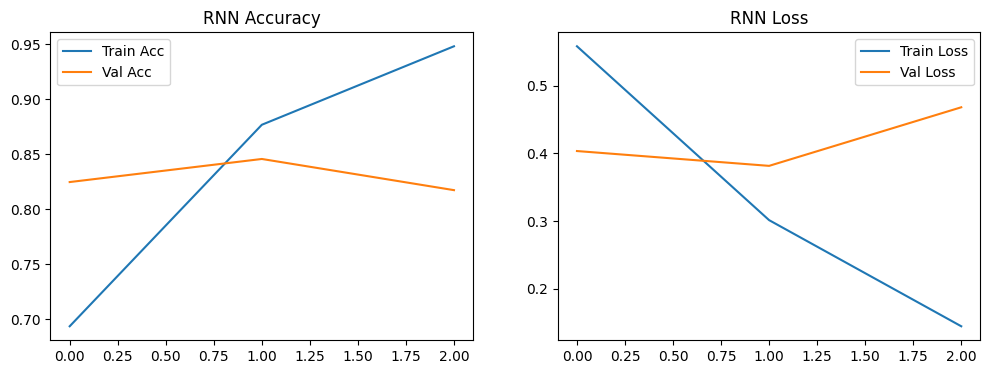

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8109 - loss: 0.4823
RNN Test Accuracy: 0.8172
Training LSTM...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7210 - loss: 0.5351 - val_accuracy: 0.8589 - val_loss: 0.3364
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8889 - loss: 0.2826 - val_accuracy: 0.8225 - val_loss: 0.4746
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9302 - loss: 0.1902 - val_accuracy: 0.8709 - val_loss: 0.3197


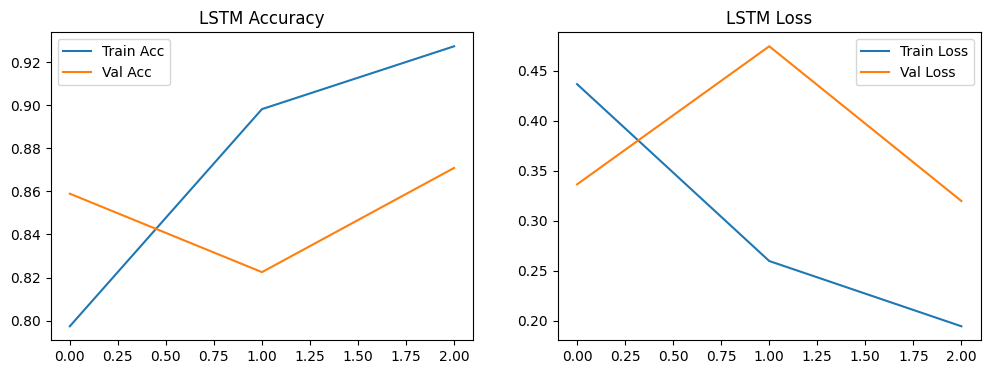

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8691 - loss: 0.3252
LSTM Test Accuracy: 0.8709
Training BiLSTM...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6848 - loss: 0.5523 - val_accuracy: 0.8561 - val_loss: 0.3421
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8985 - loss: 0.2640 - val_accuracy: 0.8659 - val_loss: 0.3199
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9386 - loss: 0.1692 - val_accuracy: 0.8666 - val_loss: 0.3139


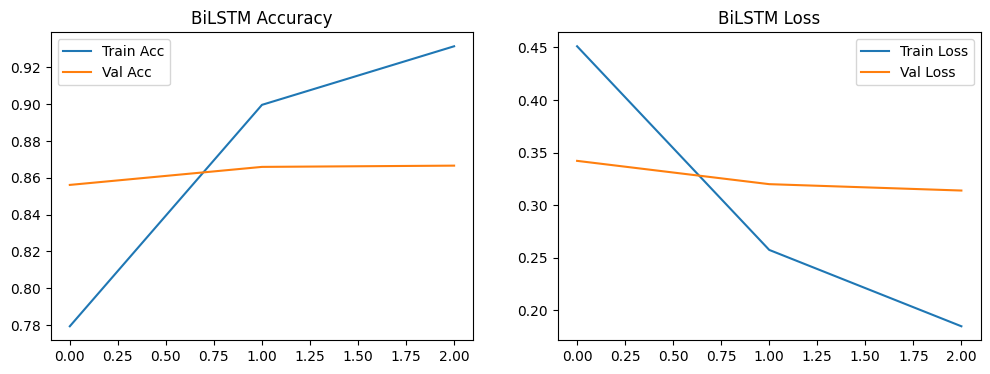

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8653 - loss: 0.3172
BiLSTM Test Accuracy: 0.8666
Training GRU...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6479 - loss: 0.6030 - val_accuracy: 0.8363 - val_loss: 0.3768
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8847 - loss: 0.2813 - val_accuracy: 0.8554 - val_loss: 0.3359
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9257 - loss: 0.2003 - val_accuracy: 0.8579 - val_loss: 0.3546


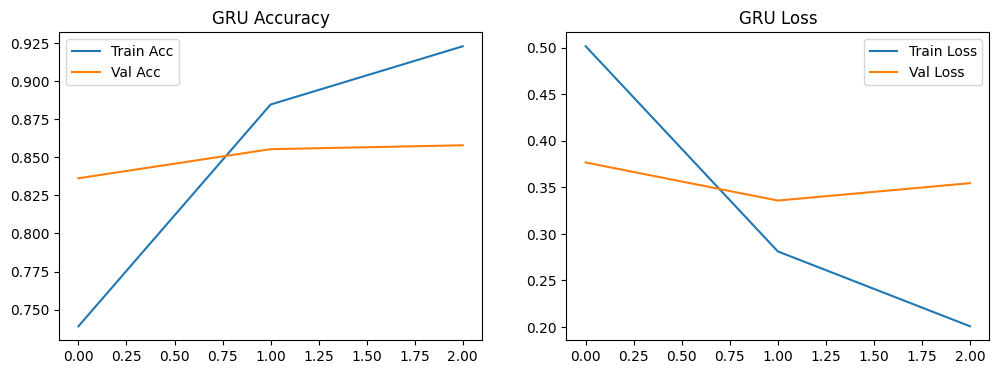

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8563 - loss: 0.3569
GRU Test Accuracy: 0.8579


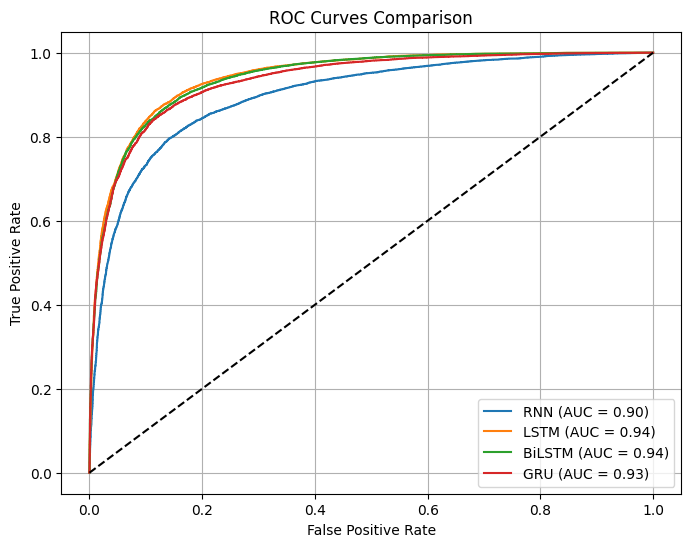

In [9]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense

# Load and preprocess IMDB dataset
vocab_size = 10000
maxlen = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Function to compile, train, evaluate with plots and ROC
def compile_train_roc(model, name, model_preds):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(f"Training {name}...")
    history = model.fit(X_train, y_train, epochs=3, batch_size=128, validation_data=(X_test, y_test))

    # Accuracy and Loss plots
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{name} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{name} Loss')
    plt.legend()
    plt.show()

    # Predictions and ROC
    y_pred_prob = model.predict(X_test)
    model_preds[name] = y_pred_prob
    loss, acc = model.evaluate(X_test, y_test)
    print(f"{name} Test Accuracy: {acc:.4f}")

# Train all models and collect predictions
model_predictions = {}

# RNN
rnn = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
compile_train_roc(rnn, "RNN", model_predictions)

# LSTM
lstm = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
compile_train_roc(lstm, "LSTM", model_predictions)

# Bi-directional LSTM
bilstm = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])
compile_train_roc(bilstm, "BiLSTM", model_predictions)

# GRU
gru = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    GRU(64),
    Dense(1, activation='sigmoid')
])
compile_train_roc(gru, "GRU", model_predictions)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, y_pred in model_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()
